# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial"
query_url = f"{url}&appid={weather_api_key}&q="

name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

print("Beginning Data Retrieval")
print("---------------------------")

for city in cities:
    try:
        response = (requests.get(query_url + city)).json()
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"]) 
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])      
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {count} | {city}")
        count += 1
    except KeyError:
        print(f"City not found, skipping . . .")
        pass
print("---------------------------")
print(f"Data Retrieval Complete")
print("---------------------------")


Beginning Data Retrieval
---------------------------
Processing Record 0 | ushuaia
Processing Record 1 | katsuura
Processing Record 2 | verkhnyaya inta
Processing Record 3 | vaini
Processing Record 4 | jamestown
Processing Record 5 | mataura
Processing Record 6 | kavieng
Processing Record 7 | sumenep
Processing Record 8 | byron bay
Processing Record 9 | saint george
City not found, skipping . . .
Processing Record 10 | roald
Processing Record 11 | kavaratti
Processing Record 12 | forestville
City not found, skipping . . .
Processing Record 13 | carnarvon
Processing Record 14 | east london
Processing Record 15 | codrington
Processing Record 16 | makungu
Processing Record 17 | hithadhoo
Processing Record 18 | wloclawek
Processing Record 19 | saskylakh
Processing Record 20 | leningradskiy
Processing Record 21 | caravelas
City not found, skipping . . .
Processing Record 22 | kapaa
City not found, skipping . . .
Processing Record 23 | pochutla
Processing Record 24 | margate
Processing Recor

Processing Record 227 | flagstaff
Processing Record 228 | cody
Processing Record 229 | kovdor
Processing Record 230 | port elizabeth
Processing Record 231 | kumano
Processing Record 232 | aykhal
Processing Record 233 | vestmannaeyjar
Processing Record 234 | goundi
Processing Record 235 | dicabisagan
Processing Record 236 | wad rawah
Processing Record 237 | rongcheng
Processing Record 238 | casa grande
City not found, skipping . . .
Processing Record 239 | guatire
Processing Record 240 | keuruu
Processing Record 241 | houston
Processing Record 242 | tabuk
City not found, skipping . . .
City not found, skipping . . .
Processing Record 243 | micheweni
Processing Record 244 | bambous virieux
City not found, skipping . . .
Processing Record 245 | mahajanga
Processing Record 246 | harstad
Processing Record 247 | castro
Processing Record 248 | gizo
Processing Record 249 | chisec
City not found, skipping . . .
Processing Record 250 | jiayuguan
Processing Record 251 | camopi
Processing Record 2

Processing Record 448 | del rio
Processing Record 449 | mount gambier
City not found, skipping . . .
Processing Record 450 | kandrian
Processing Record 451 | sayyan
Processing Record 452 | bayji
Processing Record 453 | kieta
Processing Record 454 | opuwo
Processing Record 455 | san isidro
Processing Record 456 | viedma
Processing Record 457 | ciuperceni
Processing Record 458 | mosquera
Processing Record 459 | comodoro rivadavia
Processing Record 460 | kijang
Processing Record 461 | korgen
Processing Record 462 | klaksvik
Processing Record 463 | kamaishi
Processing Record 464 | labytnangi
Processing Record 465 | kjollefjord
Processing Record 466 | cividale del friuli
Processing Record 467 | dothan
Processing Record 468 | notodden
Processing Record 469 | svetlogorsk
Processing Record 470 | qesarya
Processing Record 471 | qasigiannguit
Processing Record 472 | lamar
City not found, skipping . . .
Processing Record 473 | yerbogachen
Processing Record 474 | tirumullaivasal
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1577993539,71,-54.81,-68.31,53.60,25.28
1,Katsuura,75,JP,1577993539,75,33.93,134.50,48.00,4.70
2,Verkhnyaya Inta,60,RU,1577993539,89,65.99,60.32,2.43,6.82
3,Vaini,0,IN,1577993539,92,15.34,74.49,63.45,1.28
4,Jamestown,49,AU,1577993539,16,-33.21,138.60,75.13,15.99


In [5]:
weather_df.to_csv("../output_data/cities.csv")
weather_df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

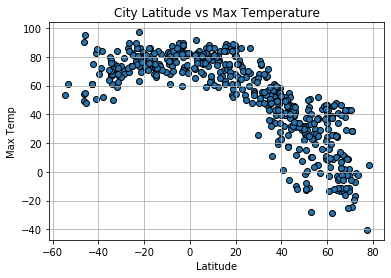

In [6]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="black")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.savefig("../Images/Lat_vs_Temp.png")

#### Latitude vs. Humidity Plot

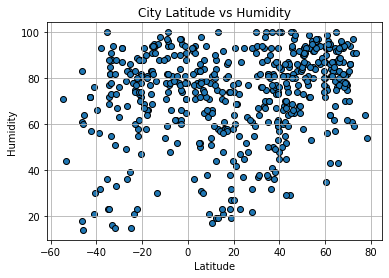

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../Images/Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

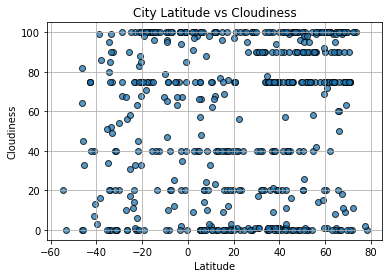

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../Images/Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

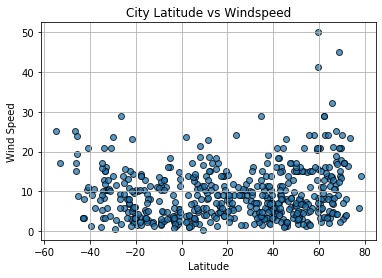

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor="black", alpha=0.75)
plt.title("City Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../Images/Lat_vs_WS.png")

## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_df = weather_df.loc[weather_df["Lat"] <= 0]

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
#TEMPERATURE LINEREGRESS
#For Northern Lat
latitude_1 = northern_df.iloc[:, 5]
temperature_1 = northern_df.iloc[:, 7]
slope, int, r, p, std_err = linregress(latitude_1, temperature_1)
fit_1 = slope * latitude_1 + int

#For Southern Lat
latitude_2 = southern_df.iloc[:, 5]
temperature_2 = southern_df.iloc[:, 7]
slope, int, r, p, std_err = linregress(latitude_2, temperature_2)
fit_2 = slope * latitude_2 + int

#HUMIDITY LINEREGRESS
#For Northern Lat
latitude_3 = northern_df.iloc[:, 5]
temperature_3 = northern_df.iloc[:, 4]
slope, int, r, p, std_err = linregress(latitude_3, temperature_3)
fit_3 = slope * latitude_3 + int

#For Southern Lat
latitude_4 = southern_df.iloc[:, 5]
temperature_4 = southern_df.iloc[:, 4]
slope, int, r, p, std_err = linregress(latitude_4, temperature_4)
fit_4 = slope * latitude_4 + int

#CLOUDINESS LINEREGRESS
#For Northern Lat
latitude_5 = northern_df.iloc[:, 5]
temperature_5 = northern_df.iloc[:, 1]
slope, int, r, p, std_err = linregress(latitude_5, temperature_5)
fit_5 = slope * latitude_5 + int

#For Southern Lat
latitude_6 = southern_df.iloc[:, 5]
temperature_6 = southern_df.iloc[:, 1]
slope, int, r, p, std_err = linregress(latitude_6, temperature_6)
fit_6 = slope * latitude_6 + int

#WINDSPEED LINEREGRESS
#For Northern Lat
latitude_7 = northern_df.iloc[:, 5]
temperature_7 = northern_df.iloc[:, 8]
slope, int, r, p, std_err = linregress(latitude_7, temperature_7)
fit_7 = slope * latitude_7 + int

#For Southern Lat
latitude_8 = southern_df.iloc[:, 5]
temperature_8 = southern_df.iloc[:, 8]
slope, int, r, p, std_err = linregress(latitude_8, temperature_8)
fit_8 = slope * latitude_8 + int


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

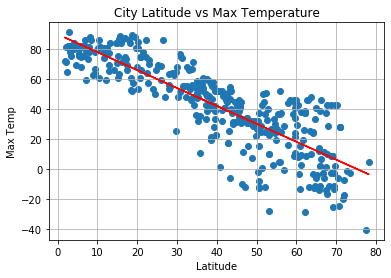

In [12]:
plt.scatter(northern_df["Lat"], northern_df["Max Temp"])
plt.plot(latitude_1, fit_1, color='red')
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.savefig("../Images/north_Lat_vs_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

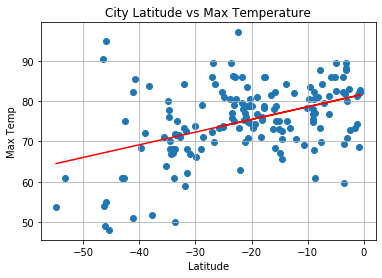

In [13]:
plt.scatter(southern_df["Lat"], southern_df["Max Temp"])
plt.plot(latitude_2, fit_2, color='red')
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.savefig("../Images/south_Lat_vs_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

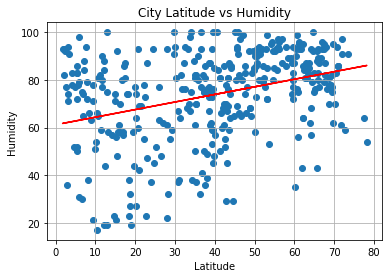

In [14]:
plt.scatter(northern_df["Lat"], northern_df["Humidity"])
plt.plot(latitude_3, fit_3, color='red')
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../Images/north_Lat_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

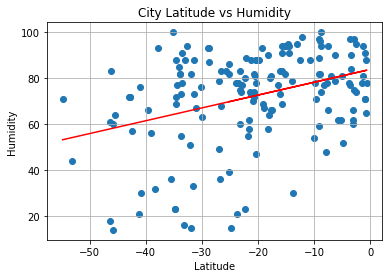

In [15]:
plt.scatter(southern_df["Lat"], southern_df["Humidity"])
plt.plot(latitude_4, fit_4, color='red')
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../Images/south_Lat_vs_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

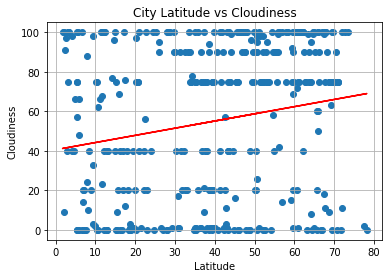

In [16]:
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"])
plt.plot(latitude_5, fit_5, color='red')
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../Images/north_Lat_vs_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

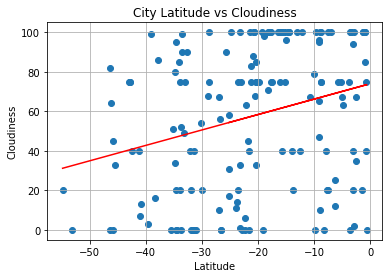

In [17]:
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"])
plt.plot(latitude_6, fit_6, color='red')
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../Images/south_Lat_vs_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

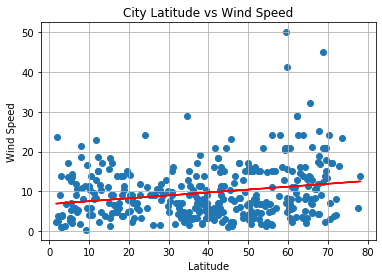

In [18]:
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"])
plt.plot(latitude_7, fit_7, color='red')
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../Images/north_Lat_vs_WS.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

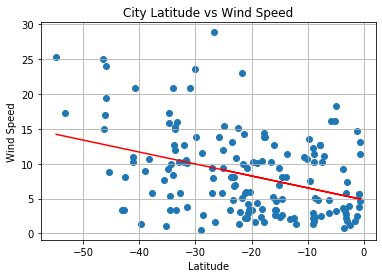

In [19]:
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"])
plt.plot(latitude_8, fit_8, color='red')
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../Images/south_Lat_vs_WS.png")

# Observable Trends

In [ ]:
#1: The Higher the altitude in the northern hemisphere, the lower the temperature (ie cold weather)  & vice versa for southern hemisphere.
#2: The Windspeed has a direct relationship with the altitude in north, vice versa for southern hemisphere.
#3: Perhaps the common trend between both north and south is the higher the altitude, the more cloudiness. 